# HELPIER- Empowering Visually Impaired with Packaged food through OCR and Deep Learning

## NUTRITION TABLE INFORMATION

In [1]:
import cv2
import re
import pytesseract
from pytesseract import Output

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

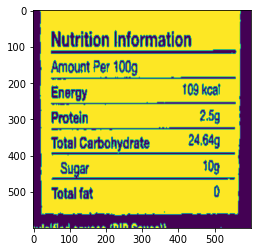

In [99]:
image = cv2.imread('saved results/nt_test1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh_img = thresh.copy()
thresh_img = cv2.resize(thresh_img, (600, 600))

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(thresh_img)

In [100]:
custom_config = r'--oem 3 --psm 6'
# now feeding image to tesseract
details = pytesseract.image_to_data(thresh, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


### removing horizontal and vertical lines

In [101]:
def boundingBox(details,thresh):
    total_boxes = len(details['text'])
    for sequence_number in range(total_boxes):
        if int(details['conf'][sequence_number]) > 30:
            (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],
                details['height'][sequence_number])
            thresh = cv2.rectangle(thresh, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return details,thresh

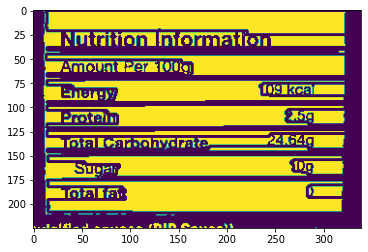

In [102]:
def removeHorizontal(thresh):
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (0, 0, 0), 2)
    return thresh

x = removeHorizontal(thresh)
imshow(x)

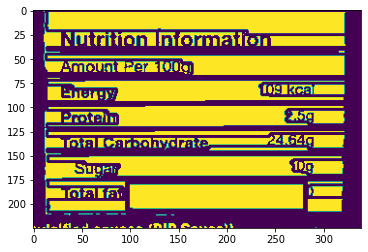

In [103]:
def removeVertical(thresh):
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))
    detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (0, 0, 0), 3)
    return thresh

x = removeVertical(thresh)
imshow(x)


In [104]:
# Dilate to connect text and remove dots
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
dilate = cv2.dilate(thresh, kernel, iterations=2)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(dilate, [c], -1, (0, 0, 0), -1)

# Bitwise-and to reconstruct image
result = cv2.bitwise_and(image, image, mask=dilate)
result[dilate == 0] = (255, 255, 255)
# imshow(dilate)

# OCR
d = pytesseract.image_to_string(x, lang='eng')
print(d)

['', '', '', '', 'Nutrition', 'Information', '', 'AmountPer', '4009', '', 'Energy', '109', 'kcal', '', 'Total', 'Carbohydrate', '__—24.64g._', '', 'Sugar', '10', '', 'Total', 'fat', '0']


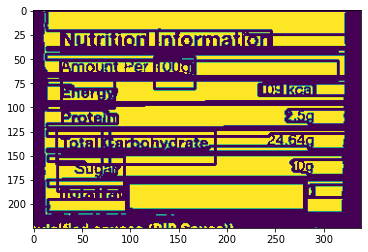

In [105]:
x,y = boundingBox(details,thresh)
print(x['text'])
imshow(y)

In [117]:
def cleantext(text):
	text= re.sub('[*|\n|\|(|)|]',' ',text)
	text = re.sub('[[}|{|\|/|,|:]',' ',text)
	text = re.sub(' +',' ',text)
	ingredients = text.split()  
	return ingredients 

In [118]:
string = ''
for i in x['text']:
    string = string+i + " "
print(string)

    Nutrition Information  AmountPer 4009  Energy 109 kcal  Total Carbohydrate __—24.64g._  Sugar 10  Total fat 0 


In [119]:
nutrition = cleantext(string)
print(nutrition)

['Nutrition', 'Information', 'AmountPer', '4009', 'Energy', '109', 'kcal', 'Total', 'Carbohydrate', '__—24.64g._', 'Sugar', '10', 'Total', 'fat', '0']


In [120]:
for i in range(len(nutrition)):
    if(nutrition[i]=='Carbohydrates' or nutrition[i]=='carbohydrates'):
        print("Carbohydrates: ",nutrition[i+1]+" "+nutrition[i+2])
    if(nutrition[i]=='Calcium' or nutrition[i]=='calcium'):
        print("Calcium: ",nutrition[i+1]+" "+nutrition[i+2])
    if(nutrition[i]=='Fiber' or nutrition[i]=='fiber'):
        print("Fiber ",nutrition[i+1]+" "+nutrition[i+2])
    if(nutrition[i]=='Protein' or nutrition[i]=='protein'):
        print("Protein: ",nutrition[i+1]+" "+nutrition[i+2])
    if(nutrition[i]=='Sodium' or nutrition[i]=='protein'):
        print("Sodium: ",nutrition[i+1]+" "+nutrition[i+2])
    if(nutrition[i]=='Sodium' or nutrition[i]=='protein'):
        print("Sodium: ",nutrition[i+1]+" "+nutrition[i+2])
        

## VEG & NON-VEG Labels checker

In [124]:
with open('saved results/test1.txt') as f:
    lines = f.readlines()

In [125]:
lines

['1 0.078125 0.926131 0.0328125 0.0492462\n',
 '3 0.182422 0.654774 0.227344 0.129648\n',
 '2 0.361719 0.894472 0.101562 0.142714\n',
 '5 0.707812 0.181407 0.153125 0.0633166\n',
 '5 0.202344 0.123618 0.340625 0.138693\n',
 '0 0.0777344 0.928643 0.0242187 0.0482412\n',
 '2 0.452344 0.685427 0.251563 0.211055\n']

In [126]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
df = pd.read_csv("13.txt",delimiter=' ')
df.head() 

,3,0.338333,0.309333,0.258,0.105333
0,5,0.667333,0.190667,0.149333,0.058667
1,5,0.659000,0.116333,0.099333,0.063333
2,5,0.661333,0.328000,0.160000,0.121333
3,0,0.741333,0.113667,0.037333,0.040667
4,2,0.330667,0.164333,0.273333,0.180667


In [127]:
colnames=['class', 'X1', 'Y1', 'X2','Y2'] 
df = pd.read_csv("13.txt",names=colnames, header=None,delimiter=' ')
df.head() 


,class,X1,Y1,X2,Y2
0,3,0.338333,0.309333,0.258000,0.105333
1,5,0.667333,0.190667,0.149333,0.058667
2,5,0.659000,0.116333,0.099333,0.063333
3,5,0.661333,0.328000,0.160000,0.121333
4,0,0.741333,0.113667,0.037333,0.040667


In [128]:
for index,row in df.iterrows():
    if(row['class']==0):
        print('veg')
        symbol='veg'
    elif(row['class']==1):
        symbol='non-veg'
        print('non-veg')

veg


# ITEM NAME

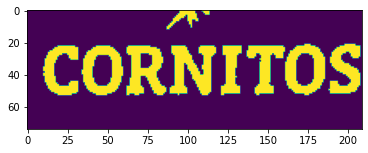

In [175]:
image = cv2.imread('saved results/itemname1_test1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh_img = thresh.copy()

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(thresh_img)

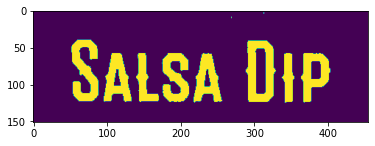

In [183]:
image = cv2.imread('saved results/itemname2_test12.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh_img = thresh.copy()

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(thresh_img)

In [185]:
itemname1 = gettext('saved results/itemname1_test1.jpg')
itemname = cleantext(itemname1)

itemname2 = gettext('saved results/itemname2_test12.jpg')
itemname2 = cleantext(itemname2)

In [351]:
SpeakText(itemname1)
SpeakText(itemname2)

# INGREDIENT LIST AND ALLERGEN CHECKER

In [129]:
import re
from difflib import SequenceMatcher
from PIL import Image
import pytesseract
import cv2
import numpy as np
import os

In [130]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

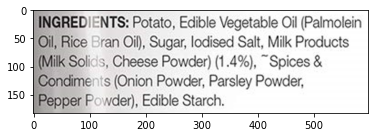

In [251]:
image = cv2.imread('13.png')
imshow(image)

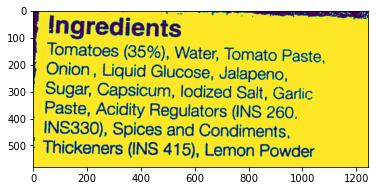

In [342]:
image = cv2.imread('saved results/ingre.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh_img = thresh.copy()

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(thresh_img)

In [ ]:
'Ingredients Tomatoes 35% Water Tomato Paste Onion Liquid Glucose Jalapeno Sugar Capsicum Iodized Salt Garlic Paste Acidity Regulators INS 260 INS330 Spices and Condiments Thickeners INS 415 Lemon Powder'

In [191]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [333]:
def cleantext(text):
    text= re.sub('[*|\|(|)|.]','',text)
    text = re.sub('[}|{|\|/|,|:]','',text)
    text = re.sub('[\n]',' ',text)
    text = re.sub(' +',' ',text)
#     text = re.sub('ee|a|diy|ain|gi|aig|als|Soe|eit|eg|SS|wtp|Satie|Ege|AR|RS|os|aH|ea|ae|We',' ',text)
    ingredients = text.split()  
    return ingredients 

In [334]:
def checksafe(ingredients,wheat):
    for i in range(len(wheat)):
    		 for j in range(len(ingredients)):
        		if similar(wheat[i],ingredients[j]) >= 0.7:
            		    print ("NOT SAFE CONTAINS ALLERGIC INGREDIENTS")
            		    #print (similar(wheat[i],ingredients[j]))
            		    return 0

    return 1  

In [335]:
custom_config = r'-l eng --psm 6'
def gettext(image):
	img = cv2.imread(image,0)
	kernel = np.ones((1,1),np.uint8)
	th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
	big = cv2.resize(th,(0,0),fx=2,fy=2)
	cv2.imwrite("ing.jpg",big)
	text = pytesseract.image_to_string(Image.open(os.path.abspath("ing.jpg")),config=custom_config)
	return text

In [330]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele + " "  
    
    # return string  
    return str1 

'ingredientstomatoes 35% water tomato pasteonion liquid glucose jalapenosugar capsicum lodized salt garlic- paste acidity regulators ins 260ins330 spices and condimentsthickeners ins 415 lemon powder '

In [299]:
Allergens=['Egg','Nut','Banana','Broccoli','Gluten','Ragweed','Milk','Mushroom','Corn','Seed','Shellfish','Fish','Honey','Beer','Potato','Peanut','Mint','Rice','Soy','wheat']

In [336]:
wheat = ['bulgur', 'cereal', 'couscous', 'cracker', 'einkorn', 'flour', 'gluten', 'malt', 
'semolina', 'triticale', 'triticum', 'bran', 'gem', 'wheat','dextrin', 'maltodextrin', 
'monosodium glutamate', 'oats', 'soy']

ingredients = gettext('saved results/ingre.jpeg')
ingredients

'Ingredients Witenes se\n\nTomatoes (35%), Water, Tomato Paste, sa\nOnion, Liquid Glucose, Jalapeno, #esqee\n. Sugar, Capsicum, lodized Salt, Garlic Sszrg\nPaste, Acidity Regulators (INS 260, “esas:\n_ INS330), Spices and Condiments, Sets\n..Thickeners (INS 415), Lemon Powder ‘#825?\nPer es adit ty Geta a Cie atin e Gr e hig eslyes NAS Mah RRR Ge ceoe oc Se\n\x0c'

In [337]:
custom_config = r'-l eng --psm 6'
text = pytesseract.image_to_string('saved results/ingre.jpeg', config=custom_config)
text

'Ingredients\n\nTomatoes (35%), Water, Tomato Paste,\n\nOnion , Liquid Glucose, Jalapeno,\n\nSugar, Capsicum, lodized Salt, Garlic\n\n- Paste, Acidity Regulators (INS 260,\nINS330), Spices and Condiments,\n\nThickeners (INS 415), Lemon Powder\n\x0c'

In [344]:
import os
arr = os.listdir('saved results/ingredients/')
arr

['ing10.png',
 'ing11.png',
 'ing12.png',
 'ing13.png',
 'ing14.png',
 'ing15.png',
 'ing2.png',
 'ing3.png',
 'ing4.png',
 'ing5.png',
 'ing6.png',
 'ing7.png',
 'ing8.png',
 'ing9.png']

In [345]:
for x in arr:
    text = pytesseract.image_to_string('saved results/ingre.jpeg', config=custom_config)
    print(text)

Ingredients

Tomatoes (35%), Water, Tomato Paste,

Onion , Liquid Glucose, Jalapeno,

Sugar, Capsicum, lodized Salt, Garlic

- Paste, Acidity Regulators (INS 260,
INS330), Spices and Condiments,

Thickeners (INS 415), Lemon Powder

Ingredients

Tomatoes (35%), Water, Tomato Paste,

Onion , Liquid Glucose, Jalapeno,

Sugar, Capsicum, lodized Salt, Garlic

- Paste, Acidity Regulators (INS 260,
INS330), Spices and Condiments,

Thickeners (INS 415), Lemon Powder

Ingredients

Tomatoes (35%), Water, Tomato Paste,

Onion , Liquid Glucose, Jalapeno,

Sugar, Capsicum, lodized Salt, Garlic

- Paste, Acidity Regulators (INS 260,
INS330), Spices and Condiments,

Thickeners (INS 415), Lemon Powder

Ingredients

Tomatoes (35%), Water, Tomato Paste,

Onion , Liquid Glucose, Jalapeno,

Sugar, Capsicum, lodized Salt, Garlic

- Paste, Acidity Regulators (INS 260,
INS330), Spices and Condiments,

Thickeners (INS 415), Lemon Powder

Ingredients

Tomatoes (35%), Water, Tomato Paste,

Onion , Liquid Gl

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['imageNo'] = ["13.png","2.png","test1.png"]
df['predictedText'] = [text,text2,text3]
df['originalText'] = [originaltext,originalText2,originalText3]
df['cer'] = ''
df['wer'] = ''


In [349]:
df = pd.read_csv('saved results/results.csv')
df.head()

,Unnamed: 0,imageNo,predictedText,originalText,cer,wer
0,0,13.png,"INGREDIENTS: Potato, Edible Vegetable Oil (Pal...","INGREDIENTS: Potato, Edible Vegetable Oil(Palm...",9.82,64.29
1,1,2.png,"INGREDIENTS: Putfed Rice (98%), Sugar, Glucose...","INGREDIENTS: Puffed Rice (98%), Sugar, Glucose...",16.78,32.50
2,2,test1.png,Ingredients Tomatoes 35% Water Tomato Paste On...,Ingredients Tomatoes 35% Water Tomato Paste On...,1.98,6.90


In [340]:
#.encode("utf-8")
ingredientslist = cleantext(text)
ingredients = listToString(ingredientslist)
print(ingredients)

Ingredients Tomatoes 35% Water Tomato Paste Onion Liquid Glucose Jalapeno Sugar Capsicum lodized Salt Garlic - Paste Acidity Regulators INS 260 INS330 Spices and Condiments Thickeners INS 415 Lemon Powder 


In [341]:
#.encode("utf-8")
print(ingredientslist)
print (len(ingredientslist))
ingredientslist = [x.lower() for x in ingredientslist]
x=0
for i in range(len(wheat)):
    for j in range(len(ingredientslist)):
#     	print (similar(wheat[i],ingredientslist[j]))
        if (similar(wheat[i],ingredientslist[j]) >= 0.9):
            x=x+1
            print(wheat[i])
# checksafe(ingredientslist,wheat)
if x>0:
	print("NOT SAFE CONTAINS POSSIBLE ALLERGIC INGREDIENTS")
else:
      print("IT IS SAFE DOESN'T CONTAIN ALLERGIC INGREDIENTS")
#print(x)


['Ingredients', 'Tomatoes', '35%', 'Water', 'Tomato', 'Paste', 'Onion', 'Liquid', 'Glucose', 'Jalapeno', 'Sugar', 'Capsicum', 'lodized', 'Salt', 'Garlic', '-', 'Paste', 'Acidity', 'Regulators', 'INS', '260', 'INS330', 'Spices', 'and', 'Condiments', 'Thickeners', 'INS', '415', 'Lemon', 'Powder']
30
IT IS SAFE DOESN'T CONTAIN ALLERGIC INGREDIENTS


In [339]:
x=0
for i in range(len(Allergens)):
    for j in range(len(ingredientslist)):
#     	print (similar(wheat[i],ingredientslist[j]))
        if (similar(Allergens[i],ingredientslist[j]) >= 0.8):
            x=x+1
            print(Allergens[i])
# checksafe(ingredientslist,wheat)
if x>0:
	print("NOT SAFE CONTAINS POSSIBLE ALLERGIC INGREDIENTS")
else:
      print("IT IS SAFE DOESN'T CONTAIN ALLERGIC INGREDIENTS")

IT IS SAFE DOESN'T CONTAIN ALLERGIC INGREDIENTS


# SPEECH RECOGNITION

In [297]:
import speech_recognition as sr
import smtplib
from bs4 import BeautifulSoup
import email
import speech_recognition as sr
import pyttsx3


import imaplib
from gtts import gTTS
import pyglet
import os, time

In [352]:
# Initialize the recognizer
r = sr.Recognizer()
 
# Function to convert text to
# speech
def SpeakText(command):
     
    # Initialize the engine
    
    engine = pyttsx3.init()
    engine.say(command)
    engine.runAndWait()
     
        
line1='The food packet is ' + symbol
line2='The allergens present in the food packet are'


SpeakText(line1)
SpeakText(line2)

In [353]:
line4='Do you want me to speak all the listed ingredients'
SpeakText(line4)

In [357]:
r = sr.Recognizer()
with sr.Microphone() as source:
    print ("Your choice:")
    audio=r.listen(source)
    print ("ok done!!")

try:
    text=r.recognize_google(audio)
    reply1="You said : "+text
    SpeakText(reply1)
    
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio.")
     
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e)) 

Your choice:
ok done!!


In [358]:
text  = 'yes'
if(text=='yes'):
    SpeakText('Here are all the ingredients present in your food packet')
    SpeakText(ingredients)
else:
    SpeakText('Speak any additional ingredients you want to know about')

In [359]:
r = sr.Recognizer()
with sr.Microphone() as source:
    print ("Your choice:")
    audio=r.listen(source)
    print ("ok done!!")

try:
    query=r.recognize_google(audio)
    reply2="You said : "+query
    SpeakText(reply2)
    
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio.")
     
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e)) 

Your choice:
ok done!!


In [360]:
print(x)
print(query)

ing9.png
Jalapeno


In [361]:
flag = 0
for x in ingredientslist:
    if(x.lower()==query.lower()):
        flag = 1
        break
#         print(x.lower())
#         print(query)
    else:
        flag = 0

if(flag==1):
    SpeakText(query+' is present in the food packet')
else:
    SpeakText('You are good to go '+ query + ' is not present in the food packet')
        